In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
import tensorflow as tf

# This CNN is used to clasify different hindi letters and numbers given in a configuration similar to the MNIST dataset. 

In [7]:
# defining Train and Test data path
train_path = '/kaggle/input/hindi-letters/DevanagariHandwrittenCharacterDataset/Train'
test_path = '/kaggle/input/hindi-letters/DevanagariHandwrittenCharacterDataset/Test'

In [8]:
# generating test and train data with tensorflow
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path, image_size=(32, 32), batch_size=32, label_mode='categorical', shuffle=True, interpolation="area")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size=(32, 32), batch_size=32, label_mode='categorical', shuffle=True, interpolation="area")

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [26]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model

In [21]:
train_data.element_spec[1].shape[1]

46

In [37]:
i = Input(shape = (32, 32, 3))
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = MaxPool2D(pool_size=(2, 2), padding = 'same')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)
x = MaxPool2D(pool_size=(2, 2), padding = 'same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(46, activation='softmax')(x)

model = Model(i, x)

In [38]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

r = model.fit(train_data, validation_data = test_data, epochs = 10)

Epoch 1/10
2444/2444 [==============================] - 149s 60ms/step - loss: 1.6334 - accuracy: 0.5458 - val_loss: 0.4916 - val_accuracy: 0.8526
Epoch 2/10
2444/2444 [==============================] - 43s 18ms/step - loss: 0.6275 - accuracy: 0.8079 - val_loss: 0.3196 - val_accuracy: 0.9029
Epoch 3/10
2444/2444 [==============================] - 44s 18ms/step - loss: 0.4779 - accuracy: 0.8557 - val_loss: 0.2737 - val_accuracy: 0.9154
Epoch 4/10
2444/2444 [==============================] - 43s 18ms/step - loss: 0.4149 - accuracy: 0.8754 - val_loss: 0.2669 - val_accuracy: 0.9178
Epoch 5/10
2444/2444 [==============================] - 44s 18ms/step - loss: 0.3823 - accuracy: 0.8849 - val_loss: 0.2716 - val_accuracy: 0.9187
Epoch 6/10
2444/2444 [==============================] - 44s 18ms/step - loss: 0.3556 - accuracy: 0.8934 - val_loss: 0.2341 - val_accuracy: 0.9320
Epoch 7/10
2444/2444 [==============================] - 44s 18ms/step - loss: 0.3416 - accuracy: 0.8989 - val_loss: 0.2322 

In [43]:
# Evaluating the model
model.evaluate(test_data)

432/432 [==============================] - 5s 11ms/step - loss: 0.2118 - accuracy: 0.9359


[0.2118397355079651, 0.935869574546814]

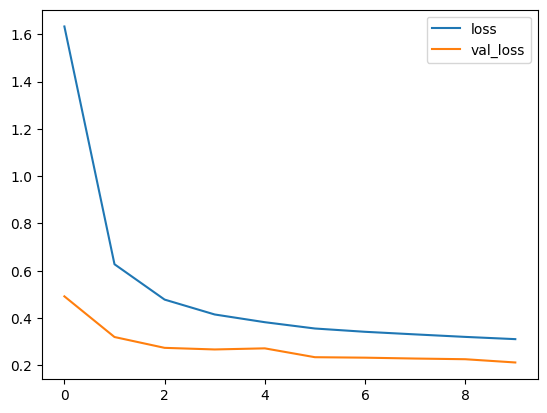

In [40]:
import matplotlib.pyplot as plt
#plotting
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

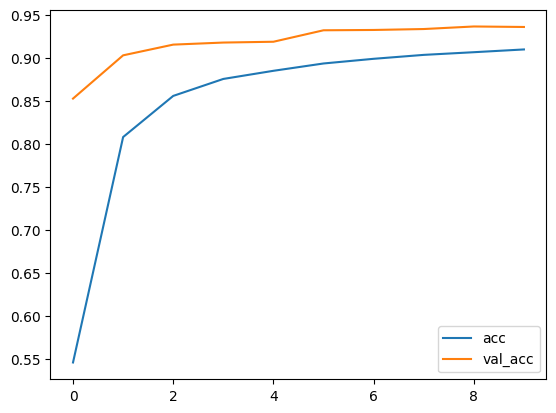

In [41]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()